In [1]:
% matplotlib inline
# % config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pickle

from limlam_mocker import limlam_mocker as llm
#Get Parameters for run
from limlam_mocker import params        as params

import lnn as lnn

### load in models
from models_to_load import *

np.random.seed(1337)

%load_ext autoreload

In [2]:
%autoreload
# %autoreload 0
#%autoreload 2

# Setup Learning Enviornment

In [3]:
import tensorflow as tf
from tensorflow import keras

mapLoc = '../maps2/basic_Li/'
different_mapLoc = '../maps2/random_maps2/'
random_small_Li_mapLoc = '../maps2/random_small_Li/'
catLoc = '../catalogues2/'
modelLoc = '../models2/'
modelLoc2 = '../models3/'
modelLoc4 = '../models4/'

### map info
numb_maps = 100
pix_x = 256
pix_y = 256

### output info
lum_func_size = 49

# Load the maps

In [4]:
subFields = lnn.loadBaseFNames(mapLoc)
base = [mapLoc + s for s in subFields]
lumLogBinCents = lnn.loadData(base[152] + '_lum.npz')['logBinCent']

subFields = lnn.loadBaseFNames(different_mapLoc)
different_base = [different_mapLoc + s for s in subFields]

# subFields = lnn.loadBaseFNames(random_small_Li_mapLoc)
# random_small_Li_base = [random_small_Li_mapLoc + s for s in subFields]

subFields = lnn.loadBaseFNames(random_small_Li_mapLoc)
np.random.seed(1234)
np.random.shuffle(subFields)
np.random.seed()

### shuffle  test and validation data
random_small_Li_base = [random_small_Li_mapLoc + s for s in subFields]

# Load Models

### Basic Models

In [5]:
noisy_resnet_full_train = get_master_res_next(modelLoc4, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='noisy_resnet_full_train',
                train_number=0, dense_layer=1000,
                droprate=0.3, base_filters=128,
                luminosity_byproduct='log', cardinality=1,
                give_weights=True, use_bias=True)

In [6]:
foreground_resnet_full_train = get_master_res_next(modelLoc4, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='foreground_resnet_full_train',
                train_number=0, dense_layer=1000,
                droprate=0.3, base_filters=128,
                luminosity_byproduct='log', cardinality=1,
                give_weights=True, use_bias=True)

In [7]:
noisy_foreground_resnet_full_train = get_master_res_next(modelLoc4, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='noisy_foreground_resnet_full_train',
                train_number=0, dense_layer=1000,
                droprate=0.3, base_filters=128,
                luminosity_byproduct='log', cardinality=1,
                give_weights=True, use_bias=True)

In [27]:
noisy_foreground_resnet_less_lums_full_train = get_master_res_next(modelLoc4, 64, 64, 10, 35,
                extra_file_name='', file_name='noisy_foreground_resnet_less_lums_full_train',
                train_number=0, dense_layer=1000,
                droprate=0.3, base_filters=128,
                luminosity_byproduct='log', cardinality=1,
                give_weights=True, use_bias=True)

### Random parameters for noise and foregrounds

In [30]:
noisy_random_resnet_full_train = get_master_res_next(modelLoc4, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='noisy_random_resnet_full_train',
                train_number=0, dense_layer=1000,
                droprate=0.3, base_filters=128,
                luminosity_byproduct='log', cardinality=1,
                give_weights=True, use_bias=True)

In [31]:
foreground_random_resnet_full_train = get_master_res_next(modelLoc4, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='foreground_resnet_full_train',
                train_number=0, dense_layer=1000,
                droprate=0.3, base_filters=128,
                luminosity_byproduct='log', cardinality=1,
                give_weights=True, use_bias=True)

In [32]:
noisy_foreground_random_resnet_less_lums_full_train = get_master_res_next(modelLoc4, 64, 64, 10, 35,
                extra_file_name='', file_name='noisy_foreground_resnet_less_lums_full_train',
                train_number=0, dense_layer=1000,
                droprate=0.3, base_filters=128,
                luminosity_byproduct='log', cardinality=1,
                give_weights=True, use_bias=True)

# See how good the models are

### Basic Models

In [16]:
%autoreload

5271 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13679_rotate_0_subfield_20__Li_-4.137e-02_1.347e+00_-1.549e+00_3.014e-01_2.866e-01 ----------------------------
Error and MSE for the given base_number:
[0.0069178002886474133, 0.014030996710062027]


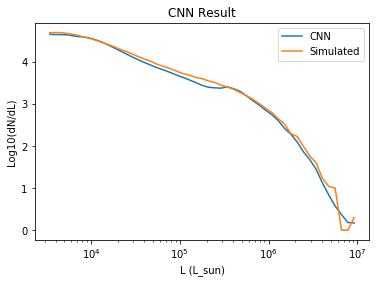

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:189: RuntimeWarning: divide by zero encountered in true_divide
  # avg = np.convolve(cnn_lum[0], window, 'same')


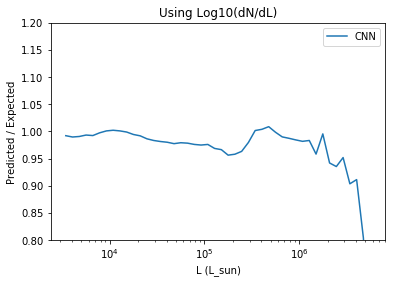

3044 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13775_rotate_0_subfield_29__Li_-2.905e-02_1.425e+00_-1.133e+00_3.110e-01_2.986e-01 ----------------------------
Error and MSE for the given base_number:
[0.11070147156715393, 0.25377824902534485]


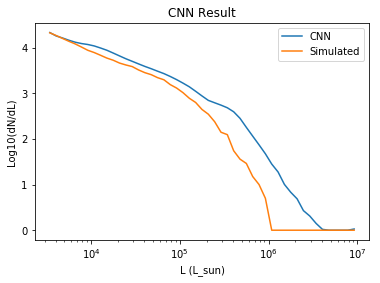

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:189: RuntimeWarning: invalid value encountered in true_divide
  # avg = np.convolve(cnn_lum[0], window, 'same')


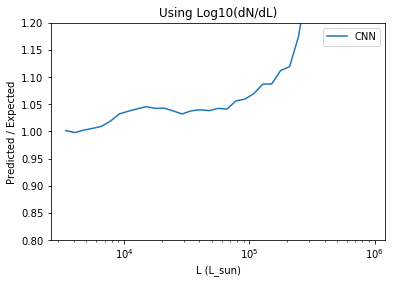

2627 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13871_rotate_0_subfield_31__Li_2.587e-02_1.389e+00_-1.878e+00_2.955e-01_2.984e-01 ----------------------------
Error and MSE for the given base_number:
[0.030403217300772667, 0.062625095248222351]


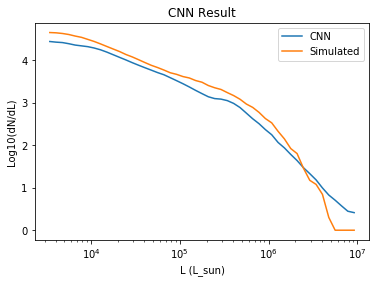

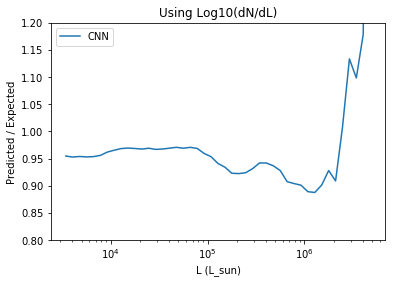

448 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13715_rotate_0_subfield_5__Li_3.258e-03_1.343e+00_-1.637e+00_3.013e-01_2.969e-01 ----------------------------
Error and MSE for the given base_number:
[0.0046510417014360428, 0.009343770332634449]


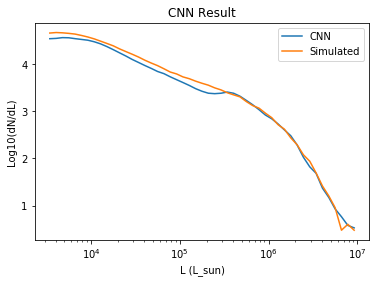

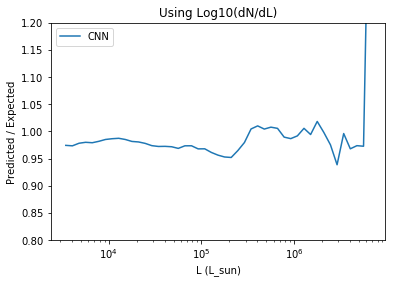

2246 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13697_rotate_0_subfield_25__Li_6.833e-03_1.382e+00_-1.082e+00_3.071e-01_3.034e-01 ----------------------------
Error and MSE for the given base_number:
[0.10687366873025894, 0.23658554255962372]


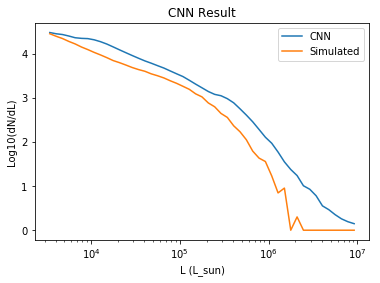

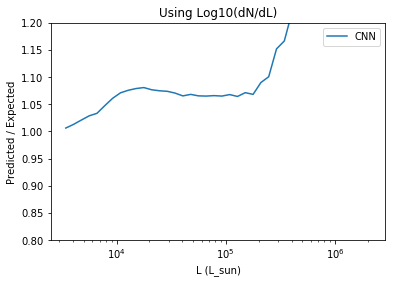

1160 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13739_rotate_0_subfield_6__Li_1.328e-02_1.342e+00_-1.501e+00_2.961e-01_2.991e-01 ----------------------------
Error and MSE for the given base_number:
[0.048867341130971909, 0.10183778405189514]


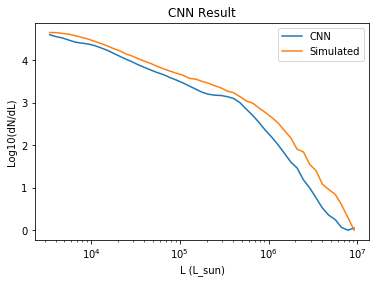

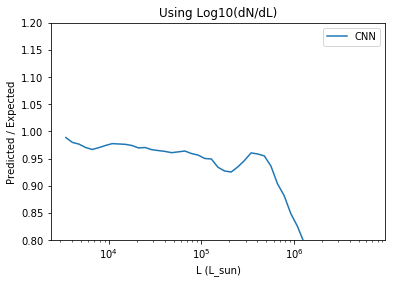

In [17]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_resnet_full_train, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=11)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

2296 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13697_rotate_0_subfield_21__Li_1.652e-02_1.373e+00_-1.174e+00_3.057e-01_2.986e-01 ----------------------------
Error and MSE for the given base_number:
[0.0054710628464818001, 0.011014422401785851]


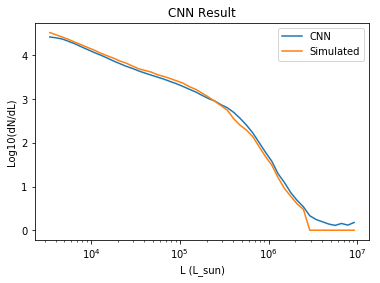

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:189: RuntimeWarning: divide by zero encountered in true_divide
  # avg = np.convolve(cnn_lum[0], window, 'same')


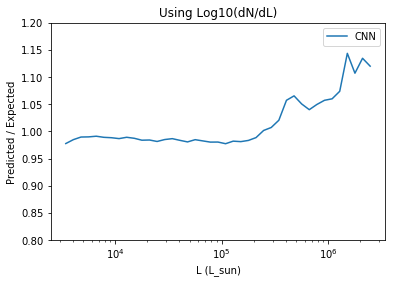

108 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13875_rotate_0_subfield_16__Li_6.751e-02_1.415e+00_-1.267e+00_3.070e-01_3.051e-01 ----------------------------
Error and MSE for the given base_number:
[0.047391332685947418, 0.098489388823509216]


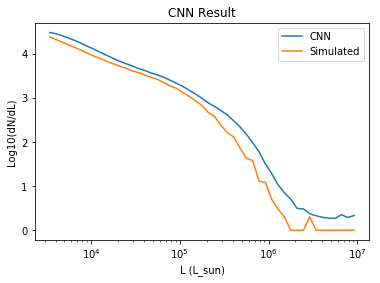

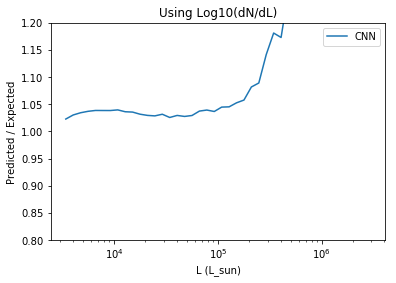

5028 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13589_rotate_0_subfield_31__Li_4.280e-03_1.364e+00_-2.184e+00_2.990e-01_2.956e-01 ----------------------------
Error and MSE for the given base_number:
[0.006563947070389986, 0.013186334632337093]


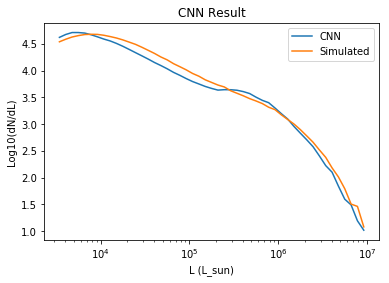

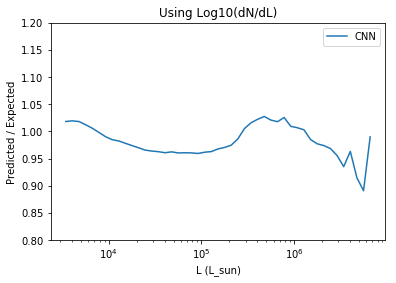

2524 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13833_rotate_0_subfield_29__Li_2.711e-02_1.357e+00_-1.133e+00_2.975e-01_2.980e-01 ----------------------------
Error and MSE for the given base_number:
[0.0065152887254953384, 0.013155793771147728]


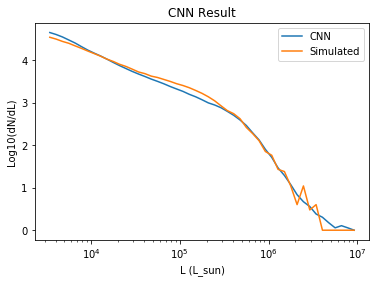

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:189: RuntimeWarning: invalid value encountered in true_divide
  # avg = np.convolve(cnn_lum[0], window, 'same')


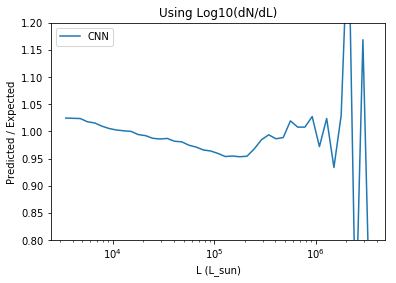

2820 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13707_rotate_0_subfield_11__Li_4.586e-02_1.432e+00_-7.655e-01_3.056e-01_2.895e-01 ----------------------------
Error and MSE for the given base_number:
[0.50321972370147705, 1.5719294548034668]


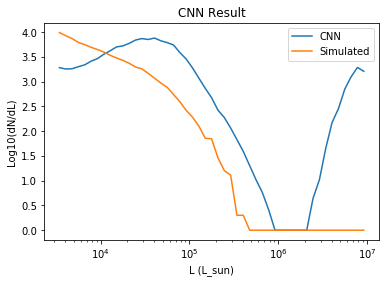

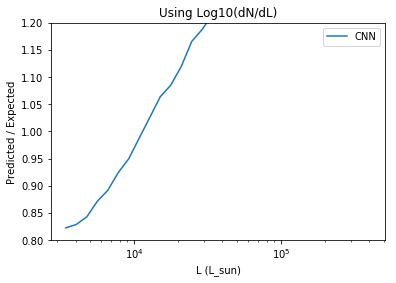

3578 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13899_rotate_0_subfield_20__Li_1.332e-02_1.311e+00_-1.598e+00_2.951e-01_2.920e-01 ----------------------------
Error and MSE for the given base_number:
[0.0067158546298742294, 0.013501716777682304]


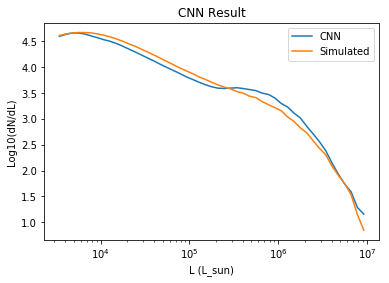

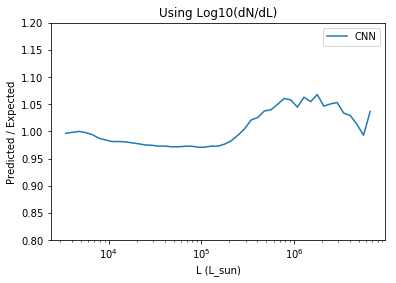

In [20]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(foreground_resnet_full_train, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=0, add_foregrounds=True)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

4804 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13815_rotate_0_subfield_22__Li_-2.810e-02_1.388e+00_-1.000e+00_2.959e-01_3.107e-01 ----------------------------
Error and MSE for the given base_number:
[0.034958161413669586, 0.072132356464862823]


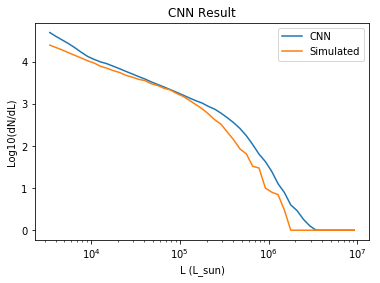

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:189: RuntimeWarning: divide by zero encountered in true_divide
  # avg = np.convolve(cnn_lum[0], window, 'same')
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:189: RuntimeWarning: invalid value encountered in true_divide
  # avg = np.convolve(cnn_lum[0], window, 'same')


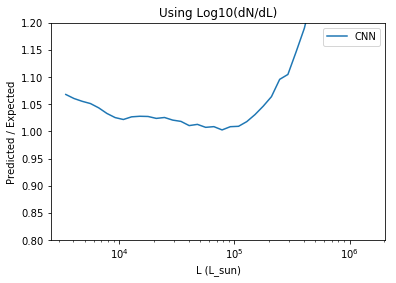

4025 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13655_rotate_0_subfield_2__Li_-1.371e-02_1.346e+00_-1.009e+00_3.086e-01_3.029e-01 ----------------------------
Error and MSE for the given base_number:
[0.0048683835193514824, 0.009925459511578083]


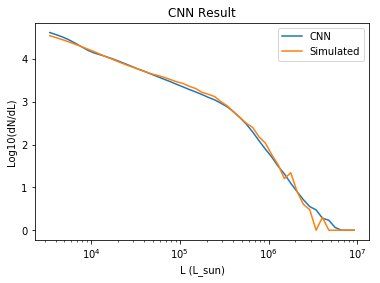

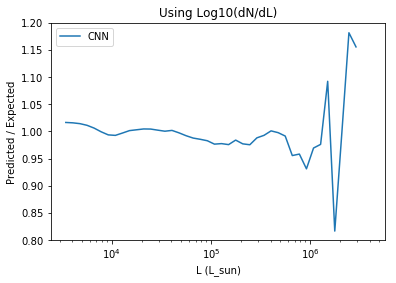

3126 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13667_rotate_0_subfield_16__Li_-2.139e-02_1.424e+00_-2.028e+00_2.967e-01_3.006e-01 ----------------------------
Error and MSE for the given base_number:
[0.046144496649503708, 0.097580201923847198]


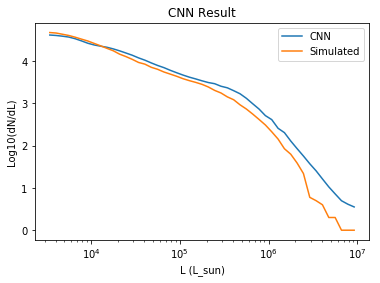

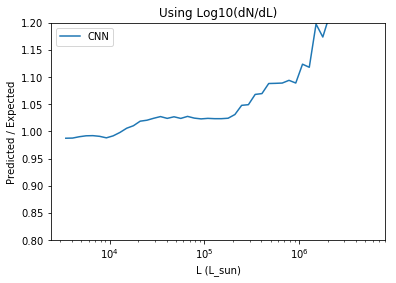

3716 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13739_rotate_0_subfield_2__Li_-9.627e-03_1.378e+00_-1.066e+00_2.982e-01_2.843e-01 ----------------------------
Error and MSE for the given base_number:
[0.067095860838890076, 0.14577314257621765]


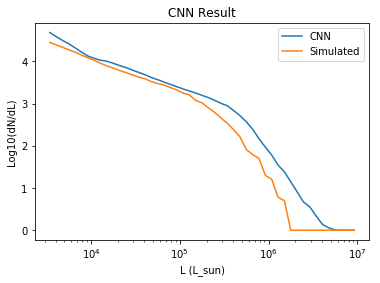

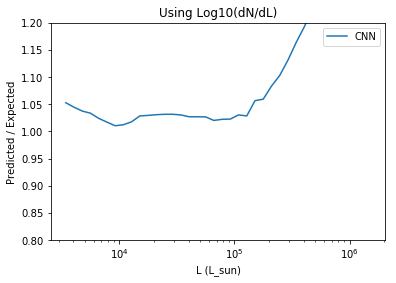

2018 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13667_rotate_0_subfield_12__Li_2.797e-02_1.352e+00_-2.088e+00_2.891e-01_2.881e-01 ----------------------------
Error and MSE for the given base_number:
[0.011168939992785454, 0.022600028663873672]


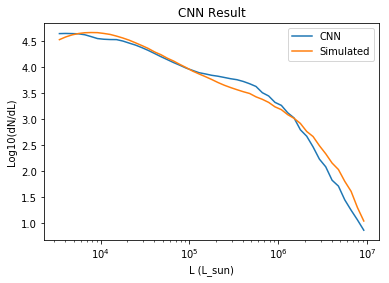

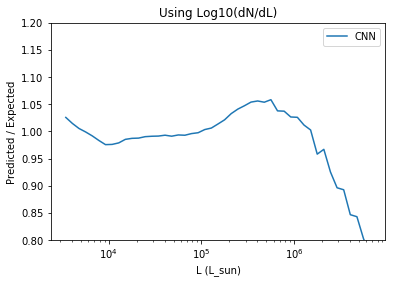

638 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13583_rotate_0_subfield_30__Li_2.254e-02_1.412e+00_-1.445e+00_2.966e-01_3.167e-01 ----------------------------
Error and MSE for the given base_number:
[0.051261443644762039, 0.11083653569221497]


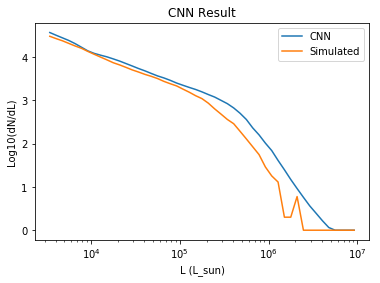

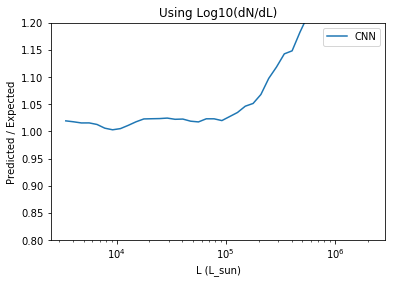

In [21]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_resnet_full_train, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=11, add_foregrounds=True)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

4521 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13817_rotate_0_subfield_17__Li_3.347e-02_1.401e+00_-2.662e+00_3.004e-01_2.892e-01 ----------------------------
Error and MSE for the given base_number:
[0.01401971373707056, 0.028263306245207787]


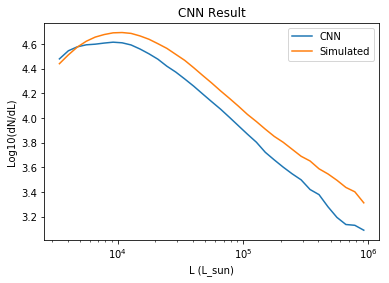

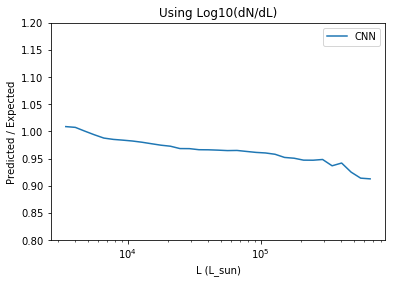

760 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13739_rotate_0_subfield_13__Li_-1.300e-03_1.367e+00_-1.760e+00_2.808e-01_3.003e-01 ----------------------------
Error and MSE for the given base_number:
[0.040244638919830322, 0.081968292593955994]


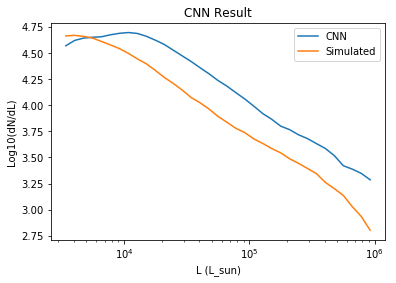

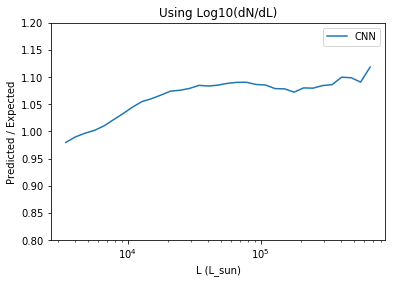

1320 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13637_rotate_0_subfield_14__Li_-6.810e-04_1.351e+00_-1.831e+00_3.077e-01_3.080e-01 ----------------------------
Error and MSE for the given base_number:
[0.0014046618016436696, 0.0028148000128567219]


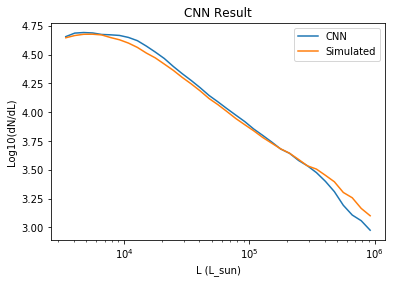

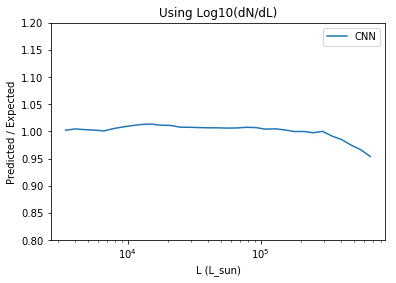

2559 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13603_rotate_0_subfield_3__Li_-3.375e-02_1.437e+00_-9.281e-01_2.979e-01_2.959e-01 ----------------------------
Error and MSE for the given base_number:
[0.25161677598953247, 0.58411812782287598]


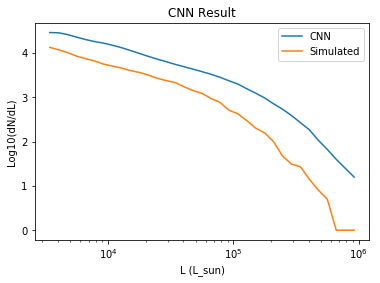

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:189: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


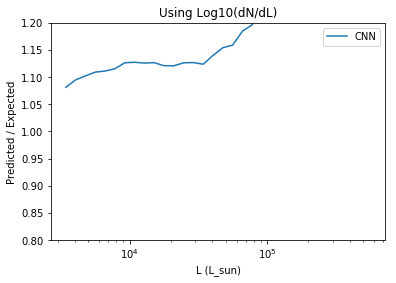

4458 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13753_rotate_0_subfield_35__Li_-1.269e-02_1.365e+00_-1.770e+00_3.104e-01_2.833e-01 ----------------------------
Error and MSE for the given base_number:
[0.0051953163929283619, 0.010413069278001785]


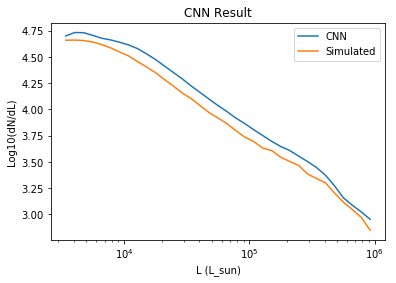

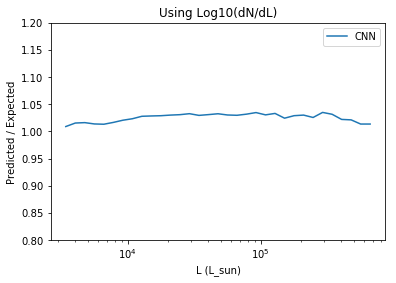

1801 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13889_rotate_0_subfield_0__Li_-3.908e-02_1.388e+00_-1.936e+00_2.912e-01_3.088e-01 ----------------------------
Error and MSE for the given base_number:
[0.0063770925626158714, 0.012878217734396458]


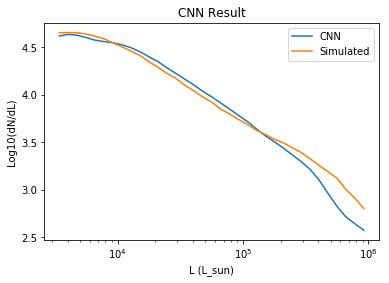

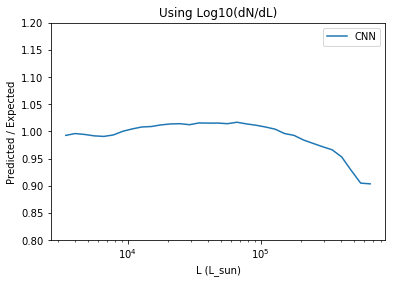

In [29]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_resnet_less_lums_full_train, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=35,
                                           make_map_noisy=11, add_foregrounds=True)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=35)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=35)

### Random parameters for noise and foregrounds

In [37]:
%autoreload

2783 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13581_rotate_0_subfield_15__Li_7.095e-03_1.394e+00_-1.193e+00_3.020e-01_3.209e-01 ----------------------------
Error and MSE for the given base_number:
[0.078671894967556, 0.16571654379367828]


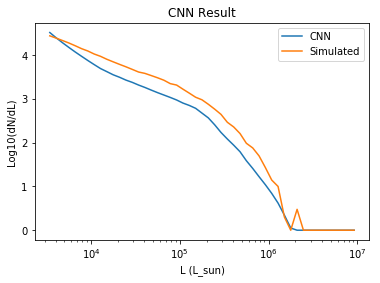

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: divide by zero encountered in true_divide
  # ratio_smooth = avg/cur_lum
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: invalid value encountered in true_divide
  # ratio_smooth = avg/cur_lum


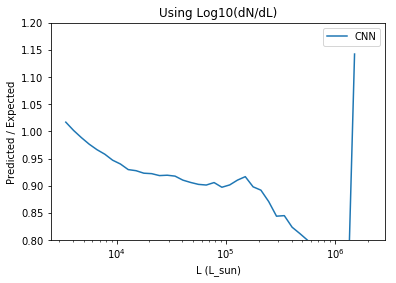

1635 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13679_rotate_0_subfield_4__Li_-4.484e-02_1.334e+00_-2.083e+00_3.150e-01_2.974e-01 ----------------------------
Error and MSE for the given base_number:
[0.1282908171415329, 0.28236424922943115]


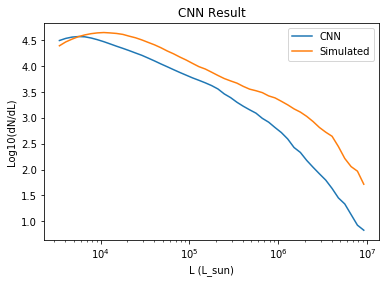

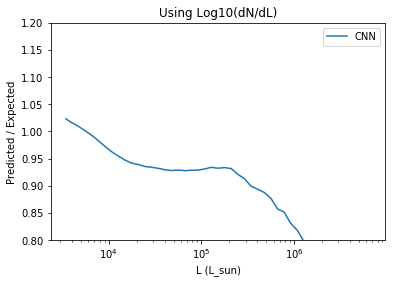

2824 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13725_rotate_0_subfield_12__Li_-1.881e-02_1.357e+00_-1.327e+00_3.102e-01_3.087e-01 ----------------------------
Error and MSE for the given base_number:
[0.03013516403734684, 0.064449012279510498]


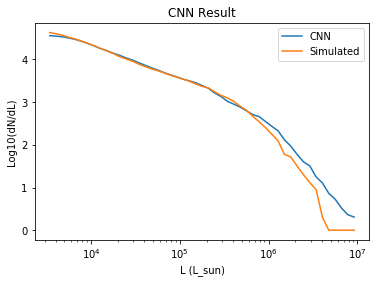

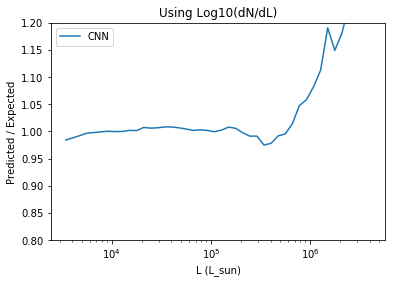

3641 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13803_rotate_0_subfield_14__Li_-4.241e-03_1.353e+00_-7.200e-01_3.036e-01_3.105e-01 ----------------------------
Error and MSE for the given base_number:
[0.1442137211561203, 0.323619544506073]


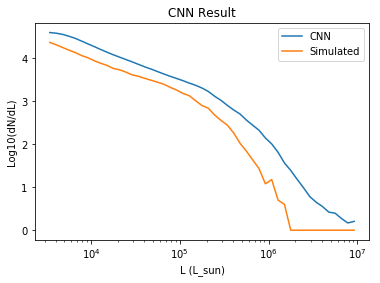

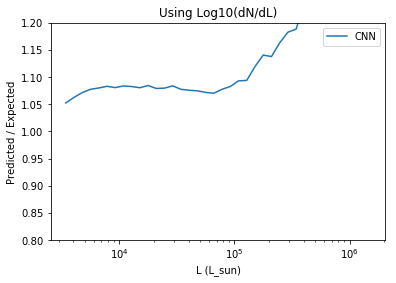

1557 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13689_rotate_0_subfield_34__Li_9.576e-03_1.385e+00_-8.602e-01_2.808e-01_2.954e-01 ----------------------------
Error and MSE for the given base_number:
[0.24139745533466339, 0.59314066171646118]


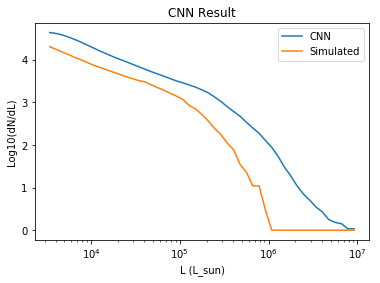

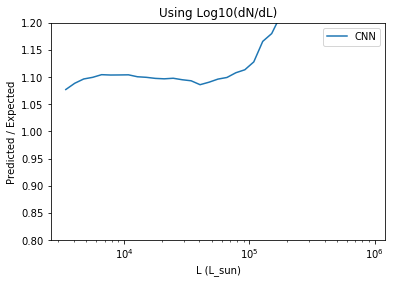

4252 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13733_rotate_0_subfield_5__Li_2.703e-02_1.346e+00_-1.986e+00_2.916e-01_3.101e-01 ----------------------------
Error and MSE for the given base_number:
[0.012093060649931431, 0.024333307519555092]


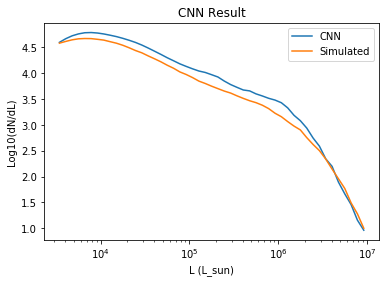

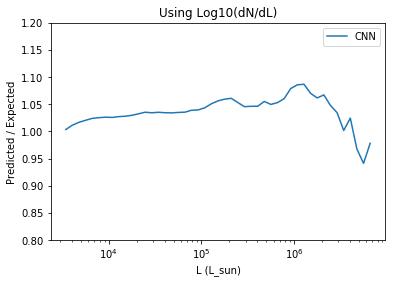

In [36]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_random_resnet_full_train, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=(0,20))
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

4515 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13847_rotate_0_subfield_22__Li_4.981e-02_1.353e+00_-1.880e+00_2.913e-01_3.041e-01 ----------------------------
Error and MSE for the given base_number:
[0.047573506832122803, 0.099182598292827606]


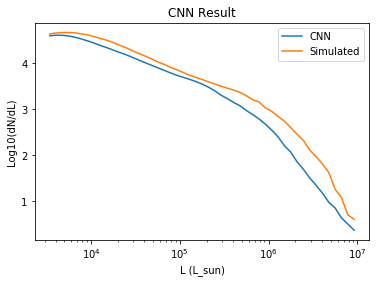

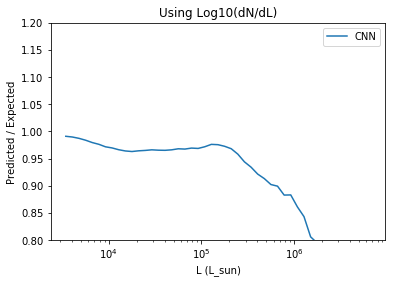

4685 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13757_rotate_0_subfield_14__Li_4.145e-02_1.404e+00_-1.629e+00_2.964e-01_3.083e-01 ----------------------------
Error and MSE for the given base_number:
[0.011976622976362705, 0.024927666410803795]


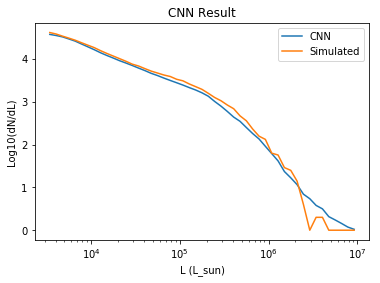

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: divide by zero encountered in true_divide
  # ratio_smooth = avg/cur_lum


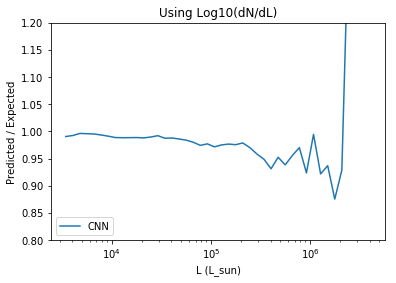

4416 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13719_rotate_0_subfield_2__Li_6.267e-03_1.357e+00_-1.660e+00_2.914e-01_2.950e-01 ----------------------------
Error and MSE for the given base_number:
[0.01633143424987793, 0.035185452550649643]


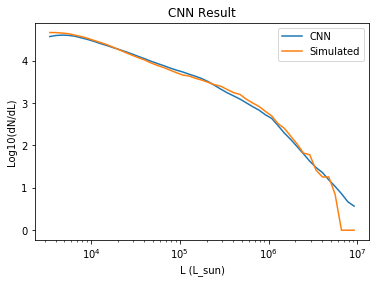

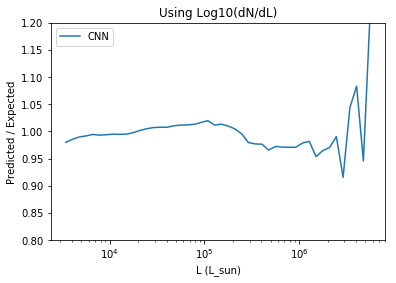

3070 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13741_rotate_0_subfield_12__Li_9.672e-03_1.330e+00_-1.297e+00_3.179e-01_3.145e-01 ----------------------------
Error and MSE for the given base_number:
[0.014181016944348812, 0.028869261965155602]


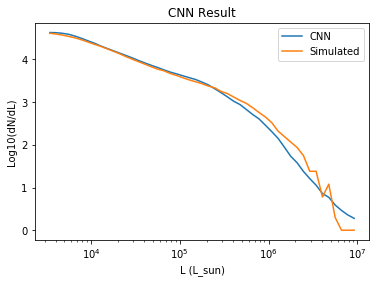

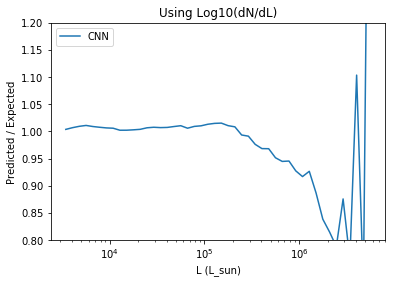

4887 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13749_rotate_0_subfield_21__Li_2.173e-02_1.414e+00_-2.016e+00_2.958e-01_3.111e-01 ----------------------------
Error and MSE for the given base_number:
[0.020960759371519089, 0.043009117245674133]


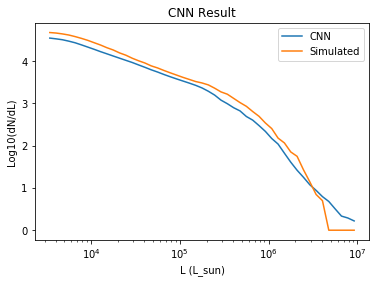

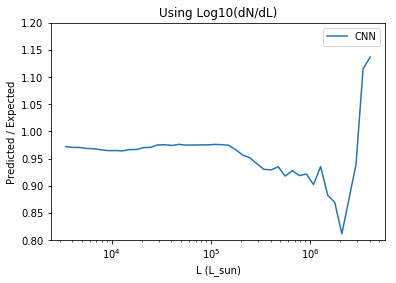

1473 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13749_rotate_0_subfield_22__Li_-3.346e-02_1.325e+00_-1.235e+00_2.972e-01_2.907e-01 ----------------------------
Error and MSE for the given base_number:
[0.016582181677222252, 0.034321930259466171]


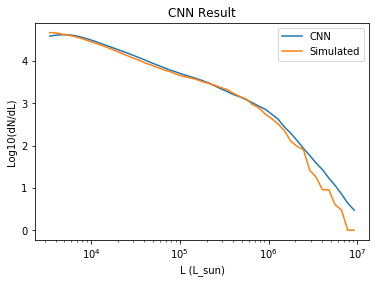

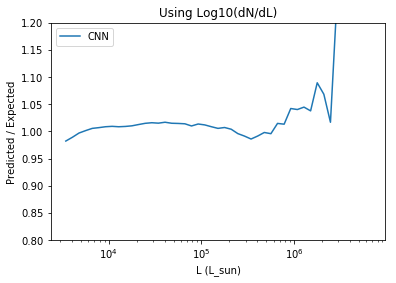

In [38]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_random_resnet_full_train, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=0, add_foregrounds=True, random_foreground_params=True)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

3939 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13591_rotate_0_subfield_2__Li_-5.363e-03_1.360e+00_-2.305e+00_3.338e-01_3.062e-01 ----------------------------
Error and MSE for the given base_number:
[0.0095226215198636055, 0.019250495359301567]


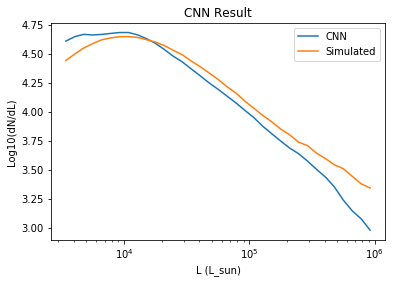

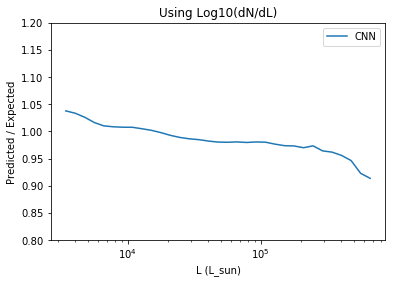

5675 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_6__Li_-1.882e-02_1.413e+00_-1.966e+00_3.068e-01_3.069e-01 ----------------------------
Error and MSE for the given base_number:
[0.0087294615805149078, 0.017538981512188911]


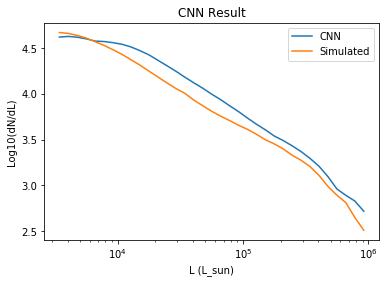

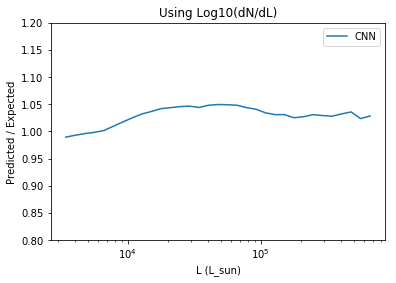

48 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13613_rotate_0_subfield_20__Li_5.356e-02_1.383e+00_-2.593e+00_2.915e-01_2.939e-01 ----------------------------
Error and MSE for the given base_number:
[0.0034773843362927437, 0.0069780973717570305]


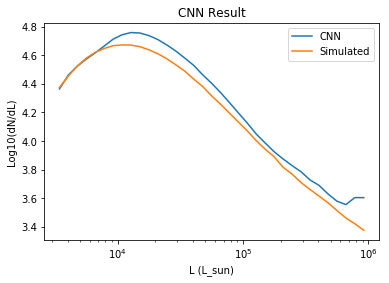

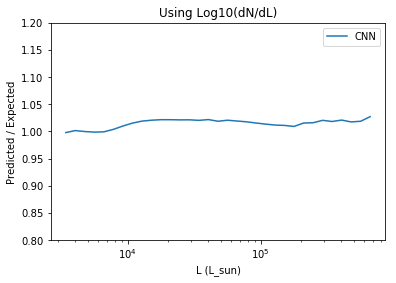

2853 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13789_rotate_0_subfield_16__Li_-1.644e-02_1.419e+00_-2.006e+00_3.008e-01_3.055e-01 ----------------------------
Error and MSE for the given base_number:
[0.0010124786058440804, 0.0020271693356335163]


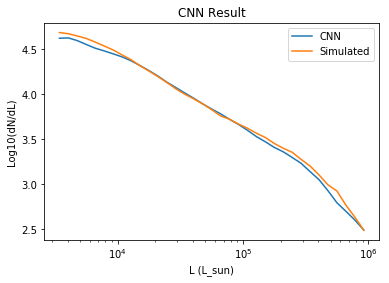

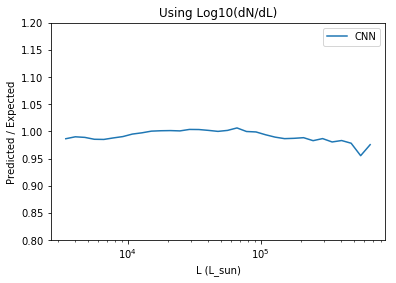

5450 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13607_rotate_0_subfield_18__Li_3.159e-02_1.480e+00_-2.900e+00_3.042e-01_3.040e-01 ----------------------------
Error and MSE for the given base_number:
[0.0084325922653079033, 0.016944795846939087]


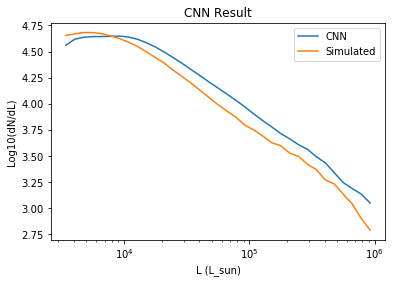

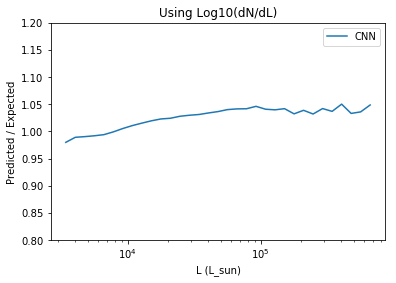

3600 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13649_rotate_0_subfield_15__Li_-1.121e-02_1.448e+00_-1.768e+00_2.970e-01_3.107e-01 ----------------------------
Error and MSE for the given base_number:
[0.017910255119204521, 0.036218184977769852]


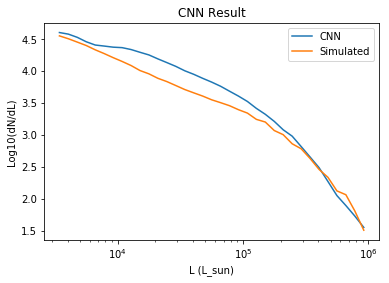

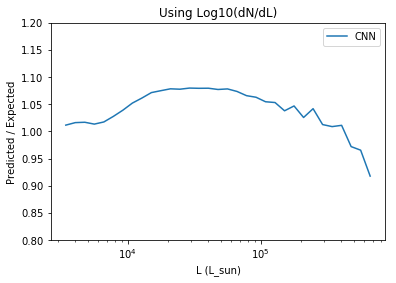

In [40]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet_less_lums_full_train, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=35,
                                           make_map_noisy=(0, 20), add_foregrounds=True, random_foreground_params=True)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=35)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=35)